<ipython-input-2-049ea4147834>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['kmeans']=yhat


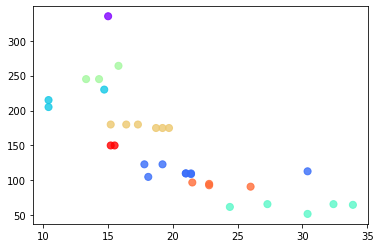

In [2]:

# Cluster analysis, or clustering, is an unsupervised machine learning task.
# It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), 
# clustering algorithms only interpret the input data and find natural groups or clusters in feature space.

import statsmodels.api as sm
import numpy as np
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df_cars = pd.DataFrame(mtcars)
df_cars.head()

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

# define dataset
X = df_cars[['mpg','hp']]


# define the model
model = KMeans(n_clusters=8)
# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

X['kmeans']=yhat

pyplot.scatter(X['mpg'], X['hp'], c=X['kmeans'], cmap='rainbow', s=50, alpha=0.8)


In [4]:

df_cars.columns

Y = df_cars['hp']

X = df_cars[['mpg', 'cyl', 'disp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',  'carb']]

# train and build a linear regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))


Linear Regression R squared": 0.7164


In [5]:

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
y_pred


array([182.26, 201.44, 127.12, 104.08, 224.98, 217.08, 209.55, 100.43,
        99.93, 209.31])

In [6]:

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)


Random Forest R squared": 0.7927
Random Forest RMSE: 26.2363


In [7]:

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_cars)
label


df_cars['kmeans'] = label
df_cars


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmeans
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,3
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,8
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,6
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,8
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,3
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,3
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1


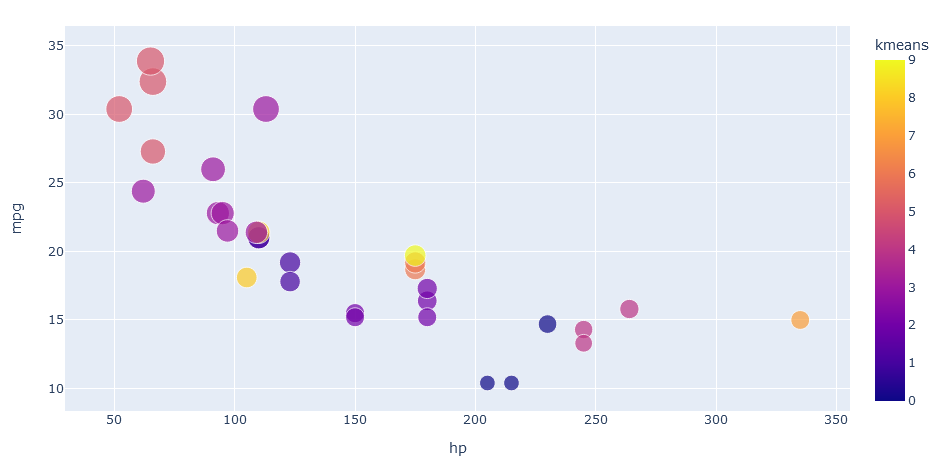

In [31]:

# K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to 
# clusters in an effort to minimize the variance within each cluster.
# The main purpose of this paper is to describe a process for partitioning an N-dimensional population into k sets 
# on the basis of a sample. The process, which is called ‘k-means,’ appears to give partitions which are reasonably 
# efficient in the sense of within-class variance.

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="kmeans", size='mpg', hover_data=['kmeans'])
fig.show()

from IPython.display import Image
Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/Clustering Algorithms Compared/kmeans.jpg', width=1900)


C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning:

'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.



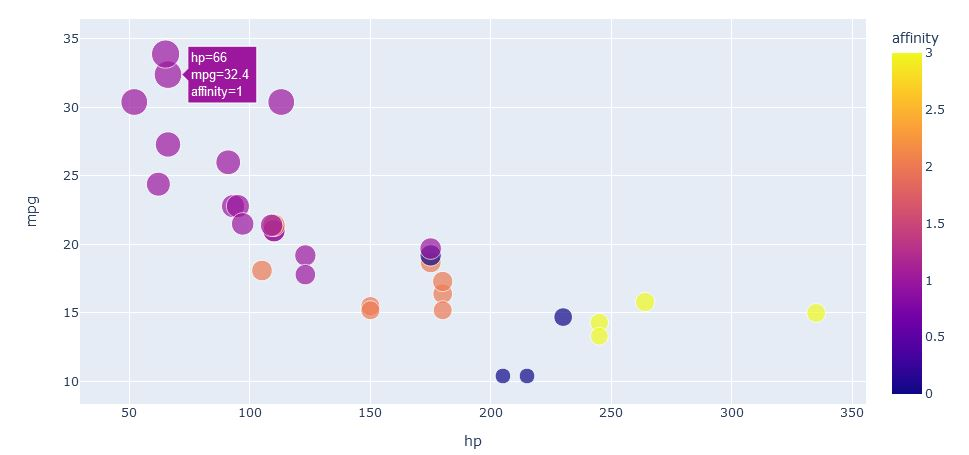

In [22]:

# Affinity Propagation involves finding a set of exemplars that best summarize the data.
# This takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged 
# between data points until a high-quality set of exemplars and corresponding clusters gradually emerges

from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['affinity'] = label
df_cars

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/Clustering Algorithms Compared/affinity.jpg', width=1900)


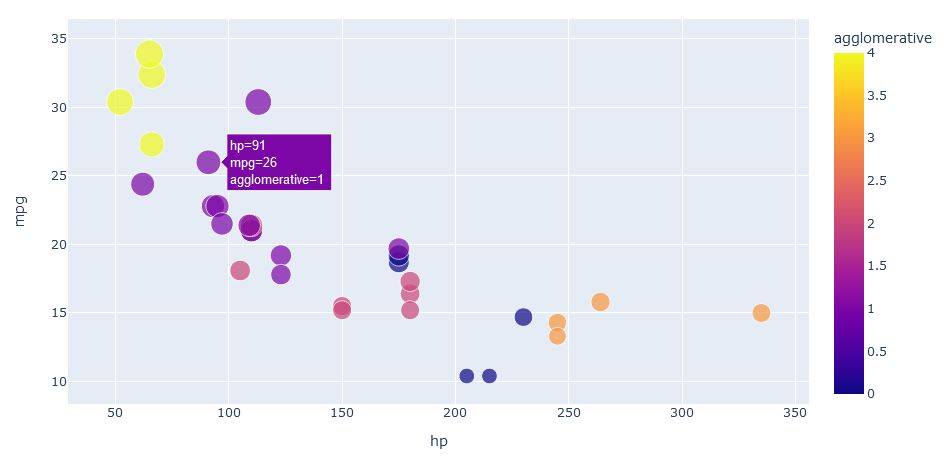

In [23]:

# Agglomerative clustering involves merging examples until the desired number of clusters is achieved.
# This is part of a broader concept of hierarchical clustering methods.

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['agglomerative'] = label
df_cars

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/Clustering Algorithms Compared/agglomerative.jpg', width=1900)


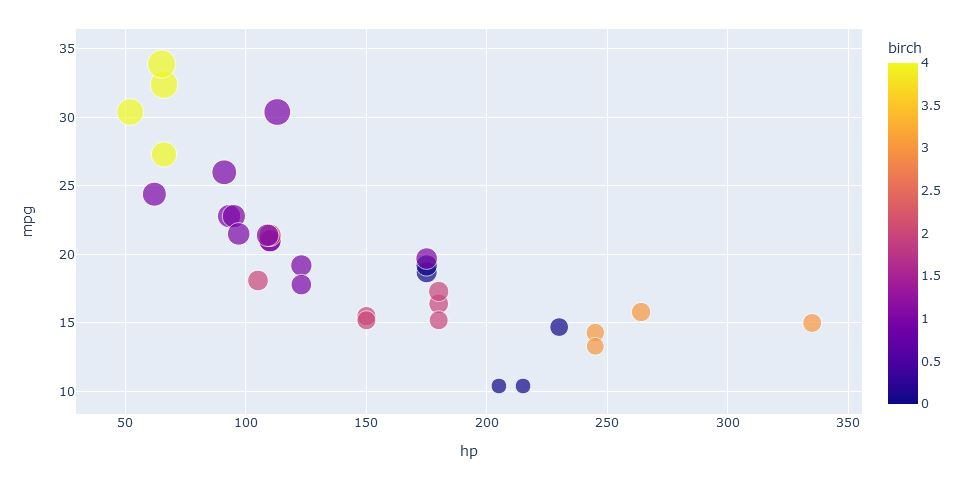

In [24]:

# BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
# Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.
# BIRCH incrementally and dynamically clusters incoming multi-dimensional metric data points to try to produce 
# the best quality clustering with the available resources (i. e., available memory and time constraints).

from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=5)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['birch'] = label
df_cars

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/Clustering Algorithms Compared/birch.jpg', width=1900)


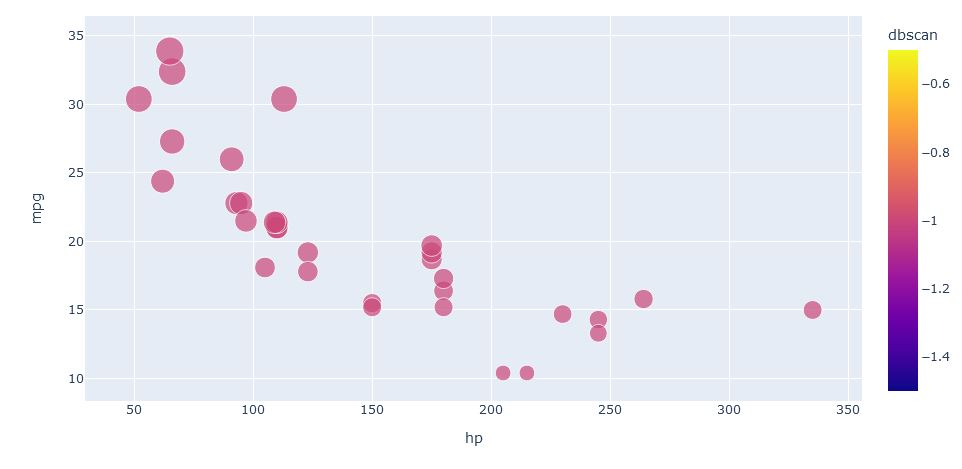

In [26]:

# DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) 
# involves finding high-density areas in the domain and expanding those areas of the feature space around them 
# as clusters.
# DBSCAN relies on a density-based notion of clusters which is designed to discover clusters of arbitrary shape. 
# DBSCAN requires only one input parameter and supports the user in determining an appropriate value for it.

from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=9)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['dbscan'] = label
df_cars

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/Clustering Algorithms Compared/dbscan.jpg', width=1900)

# Findings...all data points end up in the same cluster. Not very useful! At least we tried though!


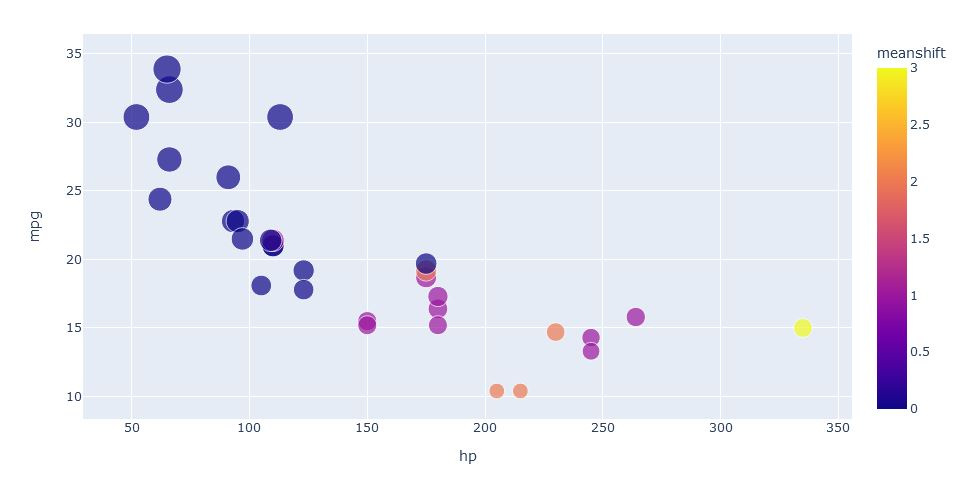

In [27]:

# Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.
# This methodology proves for discrete data, the convergence of a recursive mean shift procedure, to the nearest 
# stationary point of the underlying density function and thus its utility in detecting the modes of the density.

from sklearn.cluster import MeanShift
model = MeanShift()

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['meanshift'] = label
df_cars

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/Clustering Algorithms Compared/meanshift.jpg', width=1900)


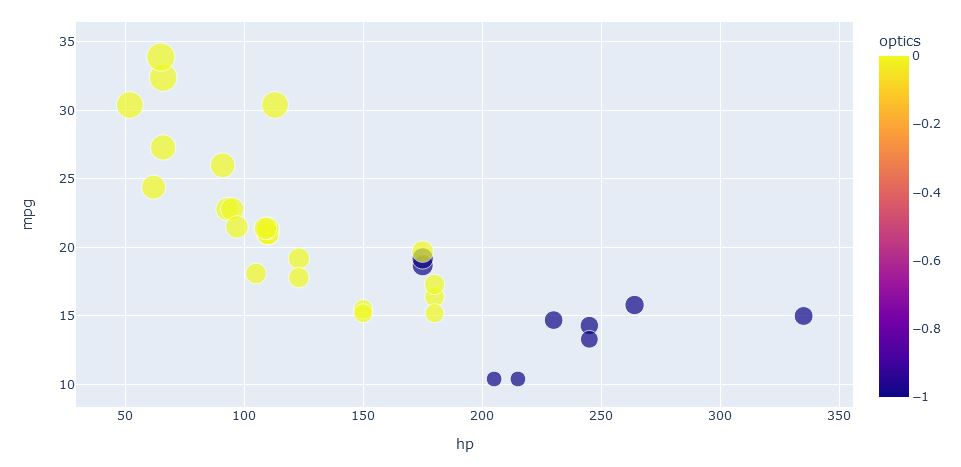

In [28]:

# OPTICS clustering (where OPTICS is short for Ordering Points To Identify the Clustering Structure) is a modified 
# version of DBSCAN described above.
# This algo is shown to NOT produce a clustering of a data set explicitly, but instead creates an augmented ordering 
# of the database representing its density-based clustering structure. 
# This cluster-ordering contains information which is equivalent to the density-based clusterings corresponding 
# to a broad range of parameter settings.

from sklearn.cluster import OPTICS
model = OPTICS(eps=0.8, min_samples=10)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['optics'] = label
df_cars

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/Clustering Algorithms Compared/optics.jpg', width=1900)


C:\Users\ryans\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



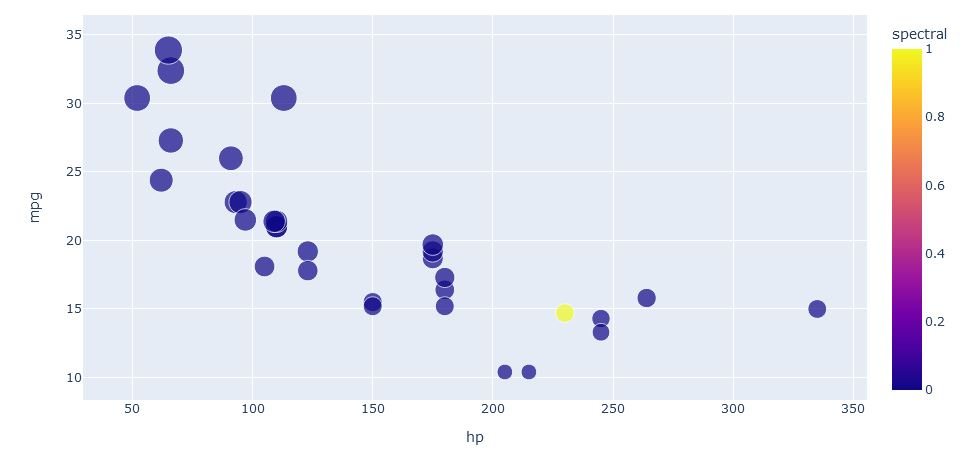

In [29]:

# Spectral Clustering is a general class of clustering methods, drawn from linear algebra.
# A promising alternative that has recently emerged in a number of fields is to use spectral methods for clustering. 
# Here, one uses the top eigenvectors of a matrix derived from the distance between points.

from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['spectral'] = label
df_cars

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/Clustering Algorithms Compared/spectral.jpg', width=1900)


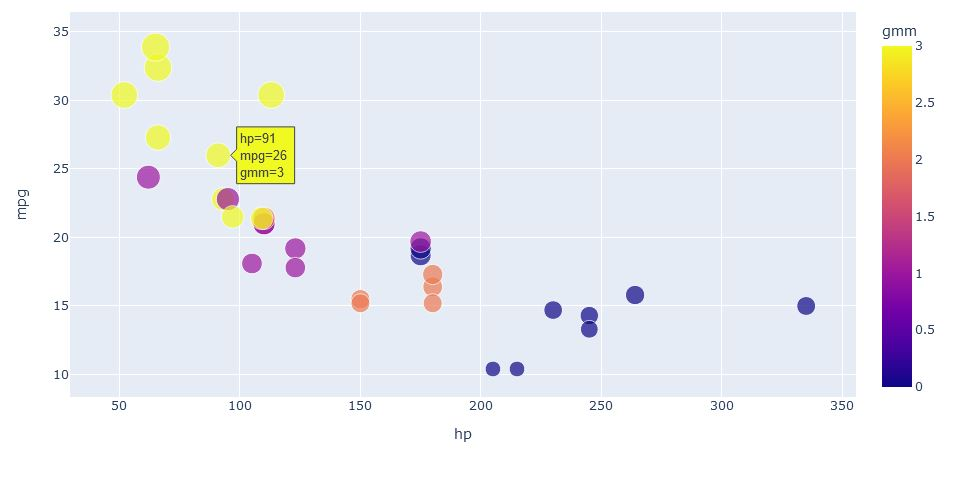

In [30]:

# A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian 
# probability distributions, as its name suggests.

from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=4)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['gmm'] = label
df_cars

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/Clustering Algorithms Compared/gmm.jpg', width=1900)
